In [1]:
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from Model.model import VAE, RegressionNN 
from utils.trainer import RegressionTrainer
from utils.data import SignalData

In [2]:
### Define and load the VAE model ###
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VAE(input_dim=448, hidden_dim=128, latent_dim=32)
model = model.to(device)

model.load_state_dict(torch.load("Checkpoints/best_VAE_32d.pt", weights_only=True))
model.eval()

### Load data and project data using VAE ###
device = "cuda" if torch.cuda.is_available() else "cpu"
signal_data = SignalData(csv_file="Data/TASK-ML-INTERN.csv", device = device)
signal_data.x = signal_data.project_data(mode = "vae", model=model)
signal_data.split_data()
trainloader, valloader, testloader = signal_data.create_dataloader(batch_size=32)

In [3]:
reg_model = RegressionNN(in_features=32, out_features=1)
reg_model = reg_model.to(device)
optimizer = torch.optim.Adam(reg_model.parameters(), lr=0.00005)
epochs = 700

loss_fn = torch.nn.BCELoss()

In [4]:
trainer = RegressionTrainer(model=reg_model, loss_fn=loss_fn, optimizer=optimizer, epochs = epochs, model_name = "best_regressor_vae32d", device = device)

In [5]:
trainer.train(trainloader=trainloader, valloader=valloader)

  1%|          | 4/700 [00:00<00:45, 15.28it/s]

Epoch 0/700 : trainloss = 0.5578741889733535 valloss = 0.5532790422439575
Epoch 1/700 : trainloss = 0.5555220246315002 valloss = 0.5507092177867889
Epoch 2/700 : trainloss = 0.5530322881845328 valloss = 0.5481604933738708
Epoch 3/700 : trainloss = 0.5504392110384427 valloss = 0.5455997586250305
Epoch 4/700 : trainloss = 0.5479078613794767 valloss = 0.5430424511432648
Epoch 5/700 : trainloss = 0.5454880136709946 valloss = 0.5404938757419586


  2%|▏         | 11/700 [00:00<00:29, 23.47it/s]

Epoch 6/700 : trainloss = 0.5441222878602835 valloss = 0.5378973186016083
Epoch 7/700 : trainloss = 0.5404773125281701 valloss = 0.5352650880813599
Epoch 8/700 : trainloss = 0.5379930138587952 valloss = 0.5325791239738464
Epoch 9/700 : trainloss = 0.5358539819717407 valloss = 0.5298423767089844
Epoch 10/700 : trainloss = 0.5325993207784799 valloss = 0.5270465016365051
Epoch 11/700 : trainloss = 0.5298114739931546 valloss = 0.5242316126823425


  2%|▏         | 17/700 [00:00<00:29, 23.00it/s]

Epoch 12/700 : trainloss = 0.5272857042459341 valloss = 0.5218539834022522
Epoch 13/700 : trainloss = 0.5250293108133169 valloss = 0.5195381343364716
Epoch 14/700 : trainloss = 0.523735761642456 valloss = 0.5171541571617126
Epoch 15/700 : trainloss = 0.521776176415957 valloss = 0.5147236585617065
Epoch 16/700 : trainloss = 0.518029497219966 valloss = 0.5122348964214325
Epoch 17/700 : trainloss = 0.5155614706186148 valloss = 0.5096489489078522


  3%|▎         | 23/700 [00:01<00:26, 25.32it/s]

Epoch 18/700 : trainloss = 0.5150755643844604 valloss = 0.5069831013679504
Epoch 19/700 : trainloss = 0.510926563006181 valloss = 0.5042544603347778
Epoch 20/700 : trainloss = 0.5079159599084121 valloss = 0.5014095902442932
Epoch 21/700 : trainloss = 0.5049679164703076 valloss = 0.498534694314003
Epoch 22/700 : trainloss = 0.5018869844766763 valloss = 0.4955449402332306
Epoch 23/700 : trainloss = 0.49916719702573925 valloss = 0.4923741817474365
Epoch 24/700 : trainloss = 0.4967420490888449 valloss = 0.48899075388908386


  4%|▍         | 31/700 [00:01<00:23, 28.58it/s]

Epoch 25/700 : trainloss = 0.49255756460703337 valloss = 0.4855368733406067
Epoch 26/700 : trainloss = 0.48914369023763216 valloss = 0.48192138969898224
Epoch 27/700 : trainloss = 0.4865119273845966 valloss = 0.4781722128391266
Epoch 28/700 : trainloss = 0.4817588283465459 valloss = 0.4743060767650604
Epoch 29/700 : trainloss = 0.4780302024804629 valloss = 0.4703148156404495
Epoch 30/700 : trainloss = 0.4741004269856673 valloss = 0.4662273973226547
Epoch 31/700 : trainloss = 0.4701884755721459 valloss = 0.46203507483005524


  5%|▌         | 38/700 [00:01<00:23, 28.06it/s]

Epoch 32/700 : trainloss = 0.4660607576370239 valloss = 0.45771045982837677
Epoch 33/700 : trainloss = 0.46197765607100266 valloss = 0.4531930088996887
Epoch 34/700 : trainloss = 0.45730831302129304 valloss = 0.44860030710697174
Epoch 35/700 : trainloss = 0.45342711760447574 valloss = 0.44382770359516144
Epoch 36/700 : trainloss = 0.4479928177136641 valloss = 0.43895089626312256
Epoch 37/700 : trainloss = 0.4433515667915344 valloss = 0.4339052140712738


  6%|▋         | 44/700 [00:01<00:24, 27.29it/s]

Epoch 38/700 : trainloss = 0.43857455024352443 valloss = 0.42871491611003876
Epoch 39/700 : trainloss = 0.4331813638026898 valloss = 0.42340029776096344
Epoch 40/700 : trainloss = 0.4299136675321139 valloss = 0.41791513562202454
Epoch 41/700 : trainloss = 0.422800749540329 valloss = 0.4123777449131012
Epoch 42/700 : trainloss = 0.4183017428104694 valloss = 0.4066612720489502
Epoch 43/700 : trainloss = 0.4120442156608288 valloss = 0.40085211396217346


  7%|▋         | 50/700 [00:01<00:23, 28.05it/s]

Epoch 44/700 : trainloss = 0.4062263392485105 valloss = 0.3949136435985565
Epoch 45/700 : trainloss = 0.4000536249234126 valloss = 0.38886070251464844
Epoch 46/700 : trainloss = 0.3945276622588818 valloss = 0.382673442363739
Epoch 47/700 : trainloss = 0.3886044369294093 valloss = 0.37642844021320343
Epoch 48/700 : trainloss = 0.3835218296601222 valloss = 0.3700621426105499
Epoch 49/700 : trainloss = 0.37591851903842044 valloss = 0.363667756319046


  8%|▊         | 57/700 [00:02<00:21, 29.23it/s]

Epoch 50/700 : trainloss = 0.369771271944046 valloss = 0.357152596116066
Epoch 51/700 : trainloss = 0.3639534138716184 valloss = 0.3505888879299164
Epoch 52/700 : trainloss = 0.35718820416010344 valloss = 0.3439645618200302
Epoch 53/700 : trainloss = 0.3509988486766815 valloss = 0.3372993767261505
Epoch 54/700 : trainloss = 0.34615413271463835 valloss = 0.3306306302547455
Epoch 55/700 : trainloss = 0.33832995937420773 valloss = 0.32398033142089844
Epoch 56/700 : trainloss = 0.33156956617648786 valloss = 0.3173035532236099


  9%|▊         | 61/700 [00:02<00:21, 29.94it/s]

Epoch 57/700 : trainloss = 0.3249308673235086 valloss = 0.31061671674251556
Epoch 58/700 : trainloss = 0.32297425545178926 valloss = 0.30386561155319214
Epoch 59/700 : trainloss = 0.312467485666275 valloss = 0.2973194420337677
Epoch 60/700 : trainloss = 0.3067376751166124 valloss = 0.2904331237077713
Epoch 61/700 : trainloss = 0.2997589615675119 valloss = 0.28348270058631897
Epoch 62/700 : trainloss = 0.2932530137208792 valloss = 0.27670717239379883
Epoch 63/700 : trainloss = 0.2885267711602725 valloss = 0.269969642162323


 10%|▉         | 69/700 [00:02<00:20, 30.06it/s]

Epoch 64/700 : trainloss = 0.2800967853802901 valloss = 0.2633862942457199
Epoch 65/700 : trainloss = 0.2766768049735289 valloss = 0.2568851038813591
Epoch 66/700 : trainloss = 0.26811685355810017 valloss = 0.2505364269018173
Epoch 67/700 : trainloss = 0.26212329130906326 valloss = 0.2442638948559761
Epoch 68/700 : trainloss = 0.25708941427560955 valloss = 0.23804617673158646
Epoch 69/700 : trainloss = 0.2512637651883639 valloss = 0.2320571094751358


 11%|█         | 76/700 [00:02<00:22, 28.00it/s]

Epoch 70/700 : trainloss = 0.24474636637247527 valloss = 0.22620952874422073
Epoch 71/700 : trainloss = 0.24147561765634096 valloss = 0.2204619124531746
Epoch 72/700 : trainloss = 0.23401270692165083 valloss = 0.2149960771203041
Epoch 73/700 : trainloss = 0.22903617299520052 valloss = 0.2095063552260399
Epoch 74/700 : trainloss = 0.22409355984284327 valloss = 0.20426011085510254
Epoch 75/700 : trainloss = 0.2190454751253128 valloss = 0.19911272078752518


 12%|█▏        | 82/700 [00:03<00:21, 28.14it/s]

Epoch 76/700 : trainloss = 0.21490384523685163 valloss = 0.19415267556905746
Epoch 77/700 : trainloss = 0.21451951219485357 valloss = 0.18930411338806152
Epoch 78/700 : trainloss = 0.2099301047050036 valloss = 0.184700608253479
Epoch 79/700 : trainloss = 0.20655438762444717 valloss = 0.1802566647529602
Epoch 80/700 : trainloss = 0.20108154530708605 valloss = 0.17606908828020096
Epoch 81/700 : trainloss = 0.19457915425300598 valloss = 0.17193954437971115


 13%|█▎        | 88/700 [00:03<00:22, 27.71it/s]

Epoch 82/700 : trainloss = 0.19021863891528204 valloss = 0.16798220574855804
Epoch 83/700 : trainloss = 0.18600728305486533 valloss = 0.1640479862689972
Epoch 84/700 : trainloss = 0.1830838700899711 valloss = 0.1603478118777275
Epoch 85/700 : trainloss = 0.17926443425508645 valloss = 0.15671008825302124
Epoch 86/700 : trainloss = 0.17620631479299986 valloss = 0.15324803441762924
Epoch 87/700 : trainloss = 0.17309273779392242 valloss = 0.14998576045036316


 14%|█▎        | 95/700 [00:03<00:20, 28.85it/s]

Epoch 88/700 : trainloss = 0.1712343440606044 valloss = 0.14679410308599472
Epoch 89/700 : trainloss = 0.167665951527082 valloss = 0.1437298282980919
Epoch 90/700 : trainloss = 0.16502779149092162 valloss = 0.1407691165804863
Epoch 91/700 : trainloss = 0.16855474274892074 valloss = 0.13794434070587158
Epoch 92/700 : trainloss = 0.16207889295541322 valloss = 0.13540250062942505
Epoch 93/700 : trainloss = 0.1577167992408459 valloss = 0.13288237527012825
Epoch 94/700 : trainloss = 0.15962519439367148 valloss = 0.13039492443203926


 15%|█▍        | 102/700 [00:03<00:19, 30.44it/s]

Epoch 95/700 : trainloss = 0.15384567700899565 valloss = 0.1281694620847702
Epoch 96/700 : trainloss = 0.15121882064984396 valloss = 0.125923041254282
Epoch 97/700 : trainloss = 0.14977119863033295 valloss = 0.12376909330487251
Epoch 98/700 : trainloss = 0.14777394728018686 valloss = 0.12171491980552673
Epoch 99/700 : trainloss = 0.14597050272501433 valloss = 0.11980428919196129
Epoch 100/700 : trainloss = 0.14811385709505814 valloss = 0.11796019971370697
Epoch 101/700 : trainloss = 0.14390303251835015 valloss = 0.11620666459202766


 15%|█▌        | 106/700 [00:03<00:19, 29.80it/s]

Epoch 102/700 : trainloss = 0.1422476934698912 valloss = 0.11452773958444595
Epoch 103/700 : trainloss = 0.14093226652878982 valloss = 0.11293027922511101
Epoch 104/700 : trainloss = 0.14005571603775024 valloss = 0.11137609928846359
Epoch 105/700 : trainloss = 0.13817233878832597 valloss = 0.10993091017007828
Epoch 106/700 : trainloss = 0.13704518400705779 valloss = 0.10851405560970306
Epoch 107/700 : trainloss = 0.13648998278837937 valloss = 0.10721231624484062


 16%|█▋        | 114/700 [00:04<00:19, 29.73it/s]

Epoch 108/700 : trainloss = 0.13501136463422042 valloss = 0.1059173159301281
Epoch 109/700 : trainloss = 0.134497409256605 valloss = 0.10476021841168404
Epoch 110/700 : trainloss = 0.1344075340491075 valloss = 0.10361432656645775
Epoch 111/700 : trainloss = 0.1374316863142527 valloss = 0.10248872637748718
Epoch 112/700 : trainloss = 0.1315515826527889 valloss = 0.10155179724097252
Epoch 113/700 : trainloss = 0.13051955917706856 valloss = 0.10049642249941826
Epoch 114/700 : trainloss = 0.13555449419296706 valloss = 0.09954487904906273


 17%|█▋        | 122/700 [00:04<00:19, 30.30it/s]

Epoch 115/700 : trainloss = 0.13051599321457055 valloss = 0.09871356561779976
Epoch 116/700 : trainloss = 0.13481062077558958 valloss = 0.09782703965902328
Epoch 117/700 : trainloss = 0.12795090904602638 valloss = 0.0970439724624157
Epoch 118/700 : trainloss = 0.13132400524157745 valloss = 0.09621132165193558
Epoch 119/700 : trainloss = 0.13506586792377326 valloss = 0.09541632607579231
Epoch 120/700 : trainloss = 0.13283763252771819 valloss = 0.09480065107345581
Epoch 121/700 : trainloss = 0.12600018485234335 valloss = 0.09416817873716354


 18%|█▊        | 126/700 [00:04<00:19, 29.24it/s]

Epoch 122/700 : trainloss = 0.12492875181711637 valloss = 0.09348327293992043
Epoch 123/700 : trainloss = 0.12544682793892348 valloss = 0.09281634166836739
Epoch 124/700 : trainloss = 0.12398630667191285 valloss = 0.0921965129673481
Epoch 125/700 : trainloss = 0.1303492715725532 valloss = 0.09155526757240295
Epoch 126/700 : trainloss = 0.12389065955693905 valloss = 0.09104209393262863
Epoch 127/700 : trainloss = 0.12469404018842258 valloss = 0.09055346995592117


 19%|█▉        | 132/700 [00:04<00:20, 27.57it/s]

Epoch 128/700 : trainloss = 0.12351454966343366 valloss = 0.09008245915174484
Epoch 129/700 : trainloss = 0.1224893514926617 valloss = 0.08957644551992416
Epoch 130/700 : trainloss = 0.12279779693255058 valloss = 0.08911203220486641
Epoch 131/700 : trainloss = 0.12290827356852017 valloss = 0.08866900950670242
Epoch 132/700 : trainloss = 0.12909143704634446 valloss = 0.08822687715291977
Epoch 133/700 : trainloss = 0.12882579691134965 valloss = 0.08792709186673164


 20%|█▉        | 138/700 [00:05<00:21, 26.64it/s]

Epoch 134/700 : trainloss = 0.12081574018184955 valloss = 0.08763812854886055
Epoch 135/700 : trainloss = 0.1278874627672709 valloss = 0.08727500960230827
Epoch 136/700 : trainloss = 0.12172533399783649 valloss = 0.08696925267577171
Epoch 137/700 : trainloss = 0.12122058639159569 valloss = 0.08667241781949997
Epoch 138/700 : trainloss = 0.12026011485319871 valloss = 0.08637925609946251
Epoch 139/700 : trainloss = 0.12128303257318643 valloss = 0.08605944737792015


 21%|██        | 145/700 [00:05<00:19, 28.63it/s]

Epoch 140/700 : trainloss = 0.12125295744492458 valloss = 0.08578350767493248
Epoch 141/700 : trainloss = 0.12074241328697938 valloss = 0.08555151522159576
Epoch 142/700 : trainloss = 0.1295679698769863 valloss = 0.0852724239230156
Epoch 143/700 : trainloss = 0.1271064694111164 valloss = 0.08501876145601273
Epoch 144/700 : trainloss = 0.12028212788013312 valloss = 0.0848967544734478
Epoch 145/700 : trainloss = 0.1217685708632836 valloss = 0.08469626680016518
Epoch 146/700 : trainloss = 0.1207451934997852 valloss = 0.08447250723838806


 22%|██▏       | 153/700 [00:05<00:18, 30.38it/s]

Epoch 147/700 : trainloss = 0.11886350180094059 valloss = 0.08429763093590736
Epoch 148/700 : trainloss = 0.12809656388484514 valloss = 0.08409779891371727
Epoch 149/700 : trainloss = 0.11938477823367485 valloss = 0.0839330144226551
Epoch 150/700 : trainloss = 0.1249787973669859 valloss = 0.08375295624136925
Epoch 151/700 : trainloss = 0.1196642850454037 valloss = 0.0836135521531105
Epoch 152/700 : trainloss = 0.1195277631855928 valloss = 0.08347603306174278
Epoch 153/700 : trainloss = 0.11948550377900784 valloss = 0.08331748098134995


 23%|██▎       | 161/700 [00:05<00:17, 31.22it/s]

Epoch 154/700 : trainloss = 0.11846162779973103 valloss = 0.08319622278213501
Epoch 155/700 : trainloss = 0.12379154992791322 valloss = 0.08303172886371613
Epoch 156/700 : trainloss = 0.11830758761901122 valloss = 0.08294608816504478
Epoch 157/700 : trainloss = 0.12017127298391782 valloss = 0.08277740329504013
Epoch 158/700 : trainloss = 0.11782601389747399 valloss = 0.082668861374259
Epoch 159/700 : trainloss = 0.11881020665168762 valloss = 0.08254950307309628
Epoch 160/700 : trainloss = 0.1192427844955371 valloss = 0.08244767971336842


 24%|██▎       | 165/700 [00:05<00:17, 30.82it/s]

Epoch 161/700 : trainloss = 0.1258956050643554 valloss = 0.08228642120957375
Epoch 162/700 : trainloss = 0.11824069945858075 valloss = 0.08223764784634113
Epoch 163/700 : trainloss = 0.11947985451955062 valloss = 0.08217300847172737
Epoch 164/700 : trainloss = 0.11935199052095413 valloss = 0.08206682465970516
Epoch 165/700 : trainloss = 0.12067699804902077 valloss = 0.08200539648532867
Epoch 166/700 : trainloss = 0.11907157158622375 valloss = 0.08189489506185055
Epoch 167/700 : trainloss = 0.11917444031972152 valloss = 0.08181457966566086


 25%|██▍       | 173/700 [00:06<00:16, 31.40it/s]

Epoch 168/700 : trainloss = 0.12431815295265271 valloss = 0.08174379914999008
Epoch 169/700 : trainloss = 0.11766204581810878 valloss = 0.08172060362994671
Epoch 170/700 : trainloss = 0.12536911924297994 valloss = 0.08163491263985634
Epoch 171/700 : trainloss = 0.1187320752785756 valloss = 0.08160916902124882
Epoch 172/700 : trainloss = 0.11887615317335495 valloss = 0.08154167234897614
Epoch 173/700 : trainloss = 0.11963821575045586 valloss = 0.0814682450145483
Epoch 174/700 : trainloss = 0.13054074719548225 valloss = 0.08137459680438042


 26%|██▌       | 181/700 [00:06<00:16, 30.68it/s]

Epoch 175/700 : trainloss = 0.11855482424681003 valloss = 0.08140223659574986
Epoch 176/700 : trainloss = 0.11864211696844834 valloss = 0.08135759085416794
Epoch 177/700 : trainloss = 0.12009313645271155 valloss = 0.08129801973700523
Epoch 178/700 : trainloss = 0.1260637308542545 valloss = 0.0812605433166027
Epoch 179/700 : trainloss = 0.11811667136274852 valloss = 0.08126410096883774
Epoch 180/700 : trainloss = 0.11976301211577195 valloss = 0.08116677589714527
Epoch 181/700 : trainloss = 0.1190211265706099 valloss = 0.08116240799427032


 27%|██▋       | 189/700 [00:06<00:16, 30.52it/s]

Epoch 182/700 : trainloss = 0.11858350668962185 valloss = 0.08110102266073227
Epoch 183/700 : trainloss = 0.1191725220817786 valloss = 0.08103896118700504
Epoch 184/700 : trainloss = 0.11822805983515886 valloss = 0.08103516511619091
Epoch 185/700 : trainloss = 0.11877954464692336 valloss = 0.08096953295171261
Epoch 186/700 : trainloss = 0.1252725052718933 valloss = 0.08087097853422165
Epoch 187/700 : trainloss = 0.11739471526100086 valloss = 0.08088981173932552
Epoch 188/700 : trainloss = 0.12438982868423828 valloss = 0.08084563724696636


 28%|██▊       | 193/700 [00:06<00:16, 30.73it/s]

Epoch 189/700 : trainloss = 0.11932725144120362 valloss = 0.08085259050130844
Epoch 190/700 : trainloss = 0.12165559398440215 valloss = 0.08082373440265656
Epoch 191/700 : trainloss = 0.13323663662259394 valloss = 0.08075484819710255
Epoch 192/700 : trainloss = 0.11799472025953807 valloss = 0.08081497997045517
Epoch 193/700 : trainloss = 0.1274321130835093 valloss = 0.08081143535673618
Epoch 194/700 : trainloss = 0.11923695527590238 valloss = 0.08084996789693832
Epoch 195/700 : trainloss = 0.11852413473220971 valloss = 0.08082087896764278


 29%|██▊       | 201/700 [00:07<00:16, 31.09it/s]

Epoch 196/700 : trainloss = 0.1180248512671544 valloss = 0.08077851310372353
Epoch 197/700 : trainloss = 0.1190278037236287 valloss = 0.0807434692978859
Epoch 198/700 : trainloss = 0.11997110568560086 valloss = 0.08072054572403431
Epoch 199/700 : trainloss = 0.11835217533203271 valloss = 0.08068221434950829
Epoch 200/700 : trainloss = 0.11859215337496537 valloss = 0.08065836131572723
Epoch 201/700 : trainloss = 0.1192780715914873 valloss = 0.08061472699046135
Epoch 202/700 : trainloss = 0.11756007287364739 valloss = 0.08062734268605709


 30%|██▉       | 209/700 [00:07<00:17, 28.80it/s]

Epoch 203/700 : trainloss = 0.11906657482569034 valloss = 0.08059624955058098
Epoch 204/700 : trainloss = 0.11836954378164731 valloss = 0.0805359948426485
Epoch 205/700 : trainloss = 0.12919517348592097 valloss = 0.08051898702979088
Epoch 206/700 : trainloss = 0.11754879040213731 valloss = 0.08053253032267094
Epoch 207/700 : trainloss = 0.11876090272114827 valloss = 0.08048839122056961
Epoch 208/700 : trainloss = 0.1255995327463517 valloss = 0.08049626275897026


 30%|███       | 212/700 [00:07<00:17, 28.69it/s]

Epoch 209/700 : trainloss = 0.11768139612216216 valloss = 0.08052455820143223
Epoch 210/700 : trainloss = 0.12660844509418195 valloss = 0.08050193451344967
Epoch 211/700 : trainloss = 0.11905605833117779 valloss = 0.08050599694252014
Epoch 212/700 : trainloss = 0.1270575844324552 valloss = 0.08044847846031189
Epoch 213/700 : trainloss = 0.12011194286438134 valloss = 0.08050328679382801
Epoch 214/700 : trainloss = 0.11809339116399105 valloss = 0.08050968870520592


 31%|███▏      | 220/700 [00:07<00:15, 30.28it/s]

Epoch 215/700 : trainloss = 0.12153553045712985 valloss = 0.08050254546105862
Epoch 216/700 : trainloss = 0.12039866040532406 valloss = 0.08045868389308453
Epoch 217/700 : trainloss = 0.11802759709266517 valloss = 0.08050095848739147
Epoch 218/700 : trainloss = 0.11854295260631122 valloss = 0.08048615232110023
Epoch 219/700 : trainloss = 0.13099627024852312 valloss = 0.08040883392095566
Epoch 220/700 : trainloss = 0.1177832383949023 valloss = 0.08046336472034454
Epoch 221/700 : trainloss = 0.11726627097680019 valloss = 0.08045264519751072


 33%|███▎      | 228/700 [00:07<00:15, 30.31it/s]

Epoch 222/700 : trainloss = 0.11739234225108074 valloss = 0.08044054731726646
Epoch 223/700 : trainloss = 0.12418435342036761 valloss = 0.08040796220302582
Epoch 224/700 : trainloss = 0.11910618383150834 valloss = 0.08036877028644085
Epoch 225/700 : trainloss = 0.11815529545912376 valloss = 0.0803996343165636
Epoch 226/700 : trainloss = 0.12380223492017159 valloss = 0.080337880179286
Epoch 227/700 : trainloss = 0.1189012212248949 valloss = 0.08040056936442852


 33%|███▎      | 232/700 [00:08<00:15, 30.17it/s]

Epoch 228/700 : trainloss = 0.11908065699614011 valloss = 0.08034705184400082
Epoch 229/700 : trainloss = 0.1197896207181307 valloss = 0.08035173453390598
Epoch 230/700 : trainloss = 0.11822697033102696 valloss = 0.08033375255763531
Epoch 231/700 : trainloss = 0.11812179048474018 valloss = 0.08029871247708797
Epoch 232/700 : trainloss = 0.11758660037930195 valloss = 0.08031341060996056
Epoch 233/700 : trainloss = 0.1277349852025509 valloss = 0.08025968633592129


 34%|███▍      | 240/700 [00:08<00:14, 30.84it/s]

Epoch 234/700 : trainloss = 0.11822199993408643 valloss = 0.08031782694160938
Epoch 235/700 : trainloss = 0.1192342283634039 valloss = 0.08031009696424007
Epoch 236/700 : trainloss = 0.11755581629964021 valloss = 0.08030135184526443
Epoch 237/700 : trainloss = 0.12771821308594483 valloss = 0.08028021827340126
Epoch 238/700 : trainloss = 0.11783244747381943 valloss = 0.0802881047129631
Epoch 239/700 : trainloss = 0.1234687902033329 valloss = 0.08029828406870365
Epoch 240/700 : trainloss = 0.11874649387139541 valloss = 0.08024452440440655


 35%|███▌      | 248/700 [00:08<00:14, 31.10it/s]

Epoch 241/700 : trainloss = 0.11912202720458691 valloss = 0.08028304763138294
Epoch 242/700 : trainloss = 0.11870313321168606 valloss = 0.08025659993290901
Epoch 243/700 : trainloss = 0.12051843536587861 valloss = 0.08025646582245827
Epoch 244/700 : trainloss = 0.11887474186145343 valloss = 0.08025881089270115
Epoch 245/700 : trainloss = 0.11884923221973273 valloss = 0.08027058094739914
Epoch 246/700 : trainloss = 0.11845109038628064 valloss = 0.08024771139025688
Epoch 247/700 : trainloss = 0.11840906338049816 valloss = 0.08019432239234447


 36%|███▌      | 252/700 [00:08<00:14, 30.39it/s]

Epoch 248/700 : trainloss = 0.11786339403345035 valloss = 0.08022545650601387
Epoch 249/700 : trainloss = 0.11918840757929362 valloss = 0.08018330298364162
Epoch 250/700 : trainloss = 0.11832826269360688 valloss = 0.08018383383750916
Epoch 251/700 : trainloss = 0.11897312792447898 valloss = 0.08020671643316746
Epoch 252/700 : trainloss = 0.11871614307165146 valloss = 0.08017404936254025
Epoch 253/700 : trainloss = 0.11873831743231186 valloss = 0.08015495538711548


 37%|███▋      | 259/700 [00:08<00:15, 29.35it/s]

Epoch 254/700 : trainloss = 0.12034496120535411 valloss = 0.08016024902462959
Epoch 255/700 : trainloss = 0.13144415559676978 valloss = 0.0801608357578516
Epoch 256/700 : trainloss = 0.11721149545449477 valloss = 0.08021887764334679
Epoch 257/700 : trainloss = 0.11762646155861708 valloss = 0.08022839017212391
Epoch 258/700 : trainloss = 0.12394246630943738 valloss = 0.08016866445541382
Epoch 259/700 : trainloss = 0.11835162398906854 valloss = 0.08019649982452393


 38%|███▊      | 266/700 [00:09<00:14, 29.62it/s]

Epoch 260/700 : trainloss = 0.11868204921483994 valloss = 0.08017490804195404
Epoch 261/700 : trainloss = 0.1187584139406681 valloss = 0.08019876852631569
Epoch 262/700 : trainloss = 0.1195851040001099 valloss = 0.0801919512450695
Epoch 263/700 : trainloss = 0.11900673921291645 valloss = 0.08017689920961857
Epoch 264/700 : trainloss = 0.11771984512989338 valloss = 0.0802136529237032
Epoch 265/700 : trainloss = 0.12053246480914262 valloss = 0.0801678653806448
Epoch 266/700 : trainloss = 0.1176697164773941 valloss = 0.08017901703715324


 39%|███▉      | 272/700 [00:09<00:15, 28.23it/s]

Epoch 267/700 : trainloss = 0.11816684959026483 valloss = 0.08016864024102688
Epoch 268/700 : trainloss = 0.11746242757026966 valloss = 0.08012661896646023
Epoch 269/700 : trainloss = 0.11830194437733063 valloss = 0.08013107441365719
Epoch 270/700 : trainloss = 0.11835651443554805 valloss = 0.08011066541075706
Epoch 271/700 : trainloss = 0.11960140271828724 valloss = 0.080100541934371
Epoch 272/700 : trainloss = 0.11866730279647388 valloss = 0.08009326457977295


 40%|███▉      | 279/700 [00:09<00:14, 29.52it/s]

Epoch 273/700 : trainloss = 0.12084102258086205 valloss = 0.08011489175260067
Epoch 274/700 : trainloss = 0.11906565840427692 valloss = 0.08010565489530563
Epoch 275/700 : trainloss = 0.12048923911956641 valloss = 0.08010127581655979
Epoch 276/700 : trainloss = 0.1181448887173946 valloss = 0.08009005337953568
Epoch 277/700 : trainloss = 0.11694436319745503 valloss = 0.08006698451936245
Epoch 278/700 : trainloss = 0.11853461139477216 valloss = 0.08005181141197681
Epoch 279/700 : trainloss = 0.11755547643854068 valloss = 0.08007068000733852


 41%|████      | 285/700 [00:09<00:14, 29.02it/s]

Epoch 280/700 : trainloss = 0.11881798333846606 valloss = 0.08004765957593918
Epoch 281/700 : trainloss = 0.11898356905350319 valloss = 0.08000860922038555
Epoch 282/700 : trainloss = 0.1195386929007677 valloss = 0.07999783754348755
Epoch 283/700 : trainloss = 0.11966116984303181 valloss = 0.0799909457564354
Epoch 284/700 : trainloss = 0.1176579649058672 valloss = 0.0799937192350626
Epoch 285/700 : trainloss = 0.11859398507154904 valloss = 0.07999550737440586


 42%|████▏     | 291/700 [00:10<00:13, 29.23it/s]

Epoch 286/700 : trainloss = 0.1199689914400761 valloss = 0.07998645678162575
Epoch 287/700 : trainloss = 0.11969488945144874 valloss = 0.07998350076377392
Epoch 288/700 : trainloss = 0.11753757928426449 valloss = 0.08001170307397842
Epoch 289/700 : trainloss = 0.11758622297873864 valloss = 0.0800249557942152
Epoch 290/700 : trainloss = 0.11790235741780354 valloss = 0.07999073155224323
Epoch 291/700 : trainloss = 0.1180336383672861 valloss = 0.08001880161464214


 42%|████▏     | 297/700 [00:10<00:14, 28.56it/s]

Epoch 292/700 : trainloss = 0.11743076718770541 valloss = 0.07998173870146275
Epoch 293/700 : trainloss = 0.11929229876169792 valloss = 0.07998396456241608
Epoch 294/700 : trainloss = 0.11974513989228469 valloss = 0.0800078995525837
Epoch 295/700 : trainloss = 0.11808727595668572 valloss = 0.0799791794270277
Epoch 296/700 : trainloss = 0.11921680346131325 valloss = 0.07999086007475853
Epoch 297/700 : trainloss = 0.12322970966880138 valloss = 0.07999205216765404


 43%|████▎     | 304/700 [00:10<00:13, 28.79it/s]

Epoch 298/700 : trainloss = 0.12527509721425864 valloss = 0.08003968931734562
Epoch 299/700 : trainloss = 0.11854881965197049 valloss = 0.0800680760294199
Epoch 300/700 : trainloss = 0.11805638040487583 valloss = 0.08006312139332294
Epoch 301/700 : trainloss = 0.12471615809660691 valloss = 0.08002180606126785
Epoch 302/700 : trainloss = 0.1199529182452422 valloss = 0.08004423789680004
Epoch 303/700 : trainloss = 0.1255047358572483 valloss = 0.0800643116235733


 44%|████▍     | 310/700 [00:10<00:14, 27.50it/s]

Epoch 304/700 : trainloss = 0.11760229703325492 valloss = 0.08008336462080479
Epoch 305/700 : trainloss = 0.12652540092284864 valloss = 0.08008939027786255
Epoch 306/700 : trainloss = 0.11838688873327695 valloss = 0.0801080446690321
Epoch 307/700 : trainloss = 0.1174869485772573 valloss = 0.08015183173120022
Epoch 308/700 : trainloss = 0.11900952802254604 valloss = 0.08010107651352882
Epoch 309/700 : trainloss = 0.11762350511092406 valloss = 0.08013949356973171


 45%|████▌     | 316/700 [00:11<00:14, 26.90it/s]

Epoch 310/700 : trainloss = 0.11986416549636768 valloss = 0.08012189902365208
Epoch 311/700 : trainloss = 0.11707023330605947 valloss = 0.0800672397017479
Epoch 312/700 : trainloss = 0.11714918682208428 valloss = 0.08003951050341129
Epoch 313/700 : trainloss = 0.11856004653068689 valloss = 0.08004111237823963
Epoch 314/700 : trainloss = 0.12384007240717228 valloss = 0.07999545335769653
Epoch 315/700 : trainloss = 0.11823186564903992 valloss = 0.08005588129162788


 46%|████▌     | 322/700 [00:11<00:13, 27.04it/s]

Epoch 316/700 : trainloss = 0.1261872758085911 valloss = 0.08004340156912804
Epoch 317/700 : trainloss = 0.11983211453144367 valloss = 0.08010552078485489
Epoch 318/700 : trainloss = 0.11778413876891136 valloss = 0.08005373366177082
Epoch 319/700 : trainloss = 0.1256910218642308 valloss = 0.08004398830235004
Epoch 320/700 : trainloss = 0.12559968863542265 valloss = 0.08010725490748882
Epoch 321/700 : trainloss = 0.11878743882362659 valloss = 0.08017197251319885


 47%|████▋     | 326/700 [00:11<00:13, 28.75it/s]

Epoch 322/700 : trainloss = 0.11770297787510432 valloss = 0.0802176296710968
Epoch 323/700 : trainloss = 0.1184426500247075 valloss = 0.0801456831395626
Epoch 324/700 : trainloss = 0.11760829188502751 valloss = 0.08015618100762367
Epoch 325/700 : trainloss = 0.11825963568228942 valloss = 0.08012872748076916
Epoch 326/700 : trainloss = 0.11809348200376217 valloss = 0.08007015101611614
Epoch 327/700 : trainloss = 0.11961879237340046 valloss = 0.08002860844135284


 48%|████▊     | 333/700 [00:11<00:12, 30.02it/s]

Epoch 328/700 : trainloss = 0.11923418996425775 valloss = 0.08002231642603874
Epoch 329/700 : trainloss = 0.1196007258616961 valloss = 0.08004528470337391
Epoch 330/700 : trainloss = 0.11709440212983352 valloss = 0.0800563246011734
Epoch 331/700 : trainloss = 0.11831523649967633 valloss = 0.08006180264055729
Epoch 332/700 : trainloss = 0.11908823223068164 valloss = 0.07994902320206165
Epoch 333/700 : trainloss = 0.12159697252970475 valloss = 0.07998169958591461
Epoch 334/700 : trainloss = 0.11945045968660942 valloss = 0.0800129845738411


 49%|████▊     | 341/700 [00:11<00:11, 31.15it/s]

Epoch 335/700 : trainloss = 0.11734216001171333 valloss = 0.08004651591181755
Epoch 336/700 : trainloss = 0.12700816788352454 valloss = 0.07996988110244274
Epoch 337/700 : trainloss = 0.11869003050602399 valloss = 0.08006144501268864
Epoch 338/700 : trainloss = 0.11845093936874317 valloss = 0.08003341592848301
Epoch 339/700 : trainloss = 0.12873106306562057 valloss = 0.08003108389675617
Epoch 340/700 : trainloss = 0.11727186464346372 valloss = 0.08007592521607876
Epoch 341/700 : trainloss = 0.11983689465201817 valloss = 0.0800669714808464


 50%|████▉     | 349/700 [00:12<00:11, 30.65it/s]

Epoch 342/700 : trainloss = 0.1176459459731212 valloss = 0.08009758777916431
Epoch 343/700 : trainloss = 0.11890511902479026 valloss = 0.08005490712821484
Epoch 344/700 : trainloss = 0.11788257555319713 valloss = 0.08004545420408249
Epoch 345/700 : trainloss = 0.1170408851825274 valloss = 0.0800464116036892
Epoch 346/700 : trainloss = 0.11871822751485385 valloss = 0.07998950406908989
Epoch 347/700 : trainloss = 0.11885510900845894 valloss = 0.07998236641287804
Epoch 348/700 : trainloss = 0.11776641154518494 valloss = 0.07991747558116913


 50%|█████     | 353/700 [00:12<00:11, 29.50it/s]

Epoch 349/700 : trainloss = 0.12373990336289772 valloss = 0.07990727014839649
Epoch 350/700 : trainloss = 0.12026734019701298 valloss = 0.07994656264781952
Epoch 351/700 : trainloss = 0.119047201023652 valloss = 0.07996715418994427
Epoch 352/700 : trainloss = 0.12541771364899781 valloss = 0.07996551506221294
Epoch 353/700 : trainloss = 0.11784019349859311 valloss = 0.08005851320922375
Epoch 354/700 : trainloss = 0.1179945904474992 valloss = 0.08006724715232849


 51%|█████▏    | 360/700 [00:12<00:11, 29.55it/s]

Epoch 355/700 : trainloss = 0.11752663266200286 valloss = 0.08001084625720978
Epoch 356/700 : trainloss = 0.11944499096045127 valloss = 0.07994031347334385
Epoch 357/700 : trainloss = 0.12613838624495727 valloss = 0.0799685325473547
Epoch 358/700 : trainloss = 0.1185993471970925 valloss = 0.08001343160867691
Epoch 359/700 : trainloss = 0.11832216038153721 valloss = 0.08001306094229221
Epoch 360/700 : trainloss = 0.1180794221850542 valloss = 0.08003612793982029
Epoch 361/700 : trainloss = 0.11910745931359437 valloss = 0.08001706004142761


 53%|█████▎    | 368/700 [00:12<00:10, 30.77it/s]

Epoch 362/700 : trainloss = 0.11901156317729217 valloss = 0.07990266382694244
Epoch 363/700 : trainloss = 0.11874983545679313 valloss = 0.07993907295167446
Epoch 364/700 : trainloss = 0.13054275627319628 valloss = 0.07992272451519966
Epoch 365/700 : trainloss = 0.1174981972345939 valloss = 0.08004019781947136
Epoch 366/700 : trainloss = 0.12252372388656323 valloss = 0.08000689558684826
Epoch 367/700 : trainloss = 0.1177106241767223 valloss = 0.08000761270523071
Epoch 368/700 : trainloss = 0.12029796552199584 valloss = 0.08005601167678833


 54%|█████▎    | 376/700 [00:12<00:10, 31.04it/s]

Epoch 369/700 : trainloss = 0.12329267337918282 valloss = 0.08000986464321613
Epoch 370/700 : trainloss = 0.1188337026307216 valloss = 0.080065393820405
Epoch 371/700 : trainloss = 0.11824409262492107 valloss = 0.08006360195577145
Epoch 372/700 : trainloss = 0.11782395008664864 valloss = 0.0800690334290266
Epoch 373/700 : trainloss = 0.11845760305340473 valloss = 0.08001112379133701
Epoch 374/700 : trainloss = 0.11840579744714957 valloss = 0.07998991571366787
Epoch 375/700 : trainloss = 0.11914995685219765 valloss = 0.0799808744341135


 54%|█████▍    | 380/700 [00:13<00:10, 30.82it/s]

Epoch 376/700 : trainloss = 0.1244800933278524 valloss = 0.0799111183732748
Epoch 377/700 : trainloss = 0.11779563616101558 valloss = 0.07995549216866493
Epoch 378/700 : trainloss = 0.12284571591478127 valloss = 0.0799309778958559
Epoch 379/700 : trainloss = 0.11806449838555776 valloss = 0.0799877904355526
Epoch 380/700 : trainloss = 0.1247484483397924 valloss = 0.07999193295836449
Epoch 381/700 : trainloss = 0.11807507964280936 valloss = 0.08001572079956532


 55%|█████▌    | 387/700 [00:13<00:10, 28.46it/s]

Epoch 382/700 : trainloss = 0.11808927156604253 valloss = 0.07999129593372345
Epoch 383/700 : trainloss = 0.11947593809320377 valloss = 0.07999567873775959
Epoch 384/700 : trainloss = 0.11744281363028747 valloss = 0.07999516651034355
Epoch 385/700 : trainloss = 0.11885302972335082 valloss = 0.07992956973612309
Epoch 386/700 : trainloss = 0.11778997859129539 valloss = 0.07996459677815437
Epoch 387/700 : trainloss = 0.11912462602441128 valloss = 0.07991977967321873


 56%|█████▋    | 394/700 [00:13<00:10, 28.68it/s]

Epoch 388/700 : trainloss = 0.11920435984547322 valloss = 0.07994302362203598
Epoch 389/700 : trainloss = 0.12640956416726112 valloss = 0.07989420928061008
Epoch 390/700 : trainloss = 0.11846498027443886 valloss = 0.07997778989374638
Epoch 391/700 : trainloss = 0.11975735254012622 valloss = 0.07994468323886395
Epoch 392/700 : trainloss = 0.11870196633614026 valloss = 0.08001390285789967
Epoch 393/700 : trainloss = 0.11941729772549409 valloss = 0.07987849600613117


 57%|█████▋    | 398/700 [00:13<00:10, 29.31it/s]

Epoch 394/700 : trainloss = 0.12330212616003476 valloss = 0.0798919815570116
Epoch 395/700 : trainloss = 0.12552464524140725 valloss = 0.0799490213394165
Epoch 396/700 : trainloss = 0.11760067853790063 valloss = 0.08005397953093052
Epoch 397/700 : trainloss = 0.11781250742765573 valloss = 0.08002999238669872
Epoch 398/700 : trainloss = 0.11859188630030705 valloss = 0.08005589805543423
Epoch 399/700 : trainloss = 0.11741827199092278 valloss = 0.08002439327538013
Epoch 400/700 : trainloss = 0.11840766983536574 valloss = 0.07992859929800034


 58%|█████▊    | 405/700 [00:13<00:09, 29.57it/s]

Epoch 401/700 : trainloss = 0.11761371275553337 valloss = 0.07990456931293011
Epoch 402/700 : trainloss = 0.11856310155529243 valloss = 0.07986134849488735
Epoch 403/700 : trainloss = 0.11876492059001556 valloss = 0.07984942011535168
Epoch 404/700 : trainloss = 0.11910967385539642 valloss = 0.0798852238804102
Epoch 405/700 : trainloss = 0.11770399602559897 valloss = 0.0798979289829731
Epoch 406/700 : trainloss = 0.11717722192406654 valloss = 0.07988894544541836
Epoch 407/700 : trainloss = 0.11772590273847947 valloss = 0.07989482954144478


 59%|█████▉    | 413/700 [00:14<00:08, 33.47it/s]

Epoch 408/700 : trainloss = 0.11764624456946667 valloss = 0.07988161221146584
Epoch 409/700 : trainloss = 0.11781479189029107 valloss = 0.07985202968120575
Epoch 410/700 : trainloss = 0.12502241077331397 valloss = 0.07982291281223297
Epoch 411/700 : trainloss = 0.11695614972939858 valloss = 0.07983416877686977
Epoch 412/700 : trainloss = 0.11866484926297115 valloss = 0.07987454533576965
Epoch 413/700 : trainloss = 0.11961168910448368 valloss = 0.07981055416166782
Epoch 414/700 : trainloss = 0.11741540323083217 valloss = 0.07984844222664833
Epoch 415/700 : trainloss = 0.11903640169363755 valloss = 0.07982330210506916


 60%|██████    | 421/700 [00:14<00:08, 34.20it/s]

Epoch 416/700 : trainloss = 0.11761078037894689 valloss = 0.07986108586192131
Epoch 417/700 : trainloss = 0.11682630187043777 valloss = 0.07985143177211285
Epoch 418/700 : trainloss = 0.11890537349077371 valloss = 0.0797406081110239
Epoch 419/700 : trainloss = 0.11755553031196961 valloss = 0.07977640815079212
Epoch 420/700 : trainloss = 0.11868334991427568 valloss = 0.07979169674217701
Epoch 421/700 : trainloss = 0.11727014441902821 valloss = 0.0797592531889677
Epoch 422/700 : trainloss = 0.1255628139926837 valloss = 0.07971457950770855


 61%|██████▏   | 429/700 [00:14<00:08, 32.59it/s]

Epoch 423/700 : trainloss = 0.1180963496176096 valloss = 0.07977837696671486
Epoch 424/700 : trainloss = 0.126651134628516 valloss = 0.0797683410346508
Epoch 425/700 : trainloss = 0.11833225878385398 valloss = 0.0798380970954895
Epoch 426/700 : trainloss = 0.11840213405398223 valloss = 0.07987081818282604
Epoch 427/700 : trainloss = 0.1199637960929137 valloss = 0.07985019125044346
Epoch 428/700 : trainloss = 0.11820855163610898 valloss = 0.07984588108956814
Epoch 429/700 : trainloss = 0.11837528875240913 valloss = 0.07987657934427261


 62%|██████▏   | 437/700 [00:14<00:08, 32.23it/s]

Epoch 430/700 : trainloss = 0.11837200705821697 valloss = 0.07988249510526657
Epoch 431/700 : trainloss = 0.11697159621577996 valloss = 0.07987249828875065
Epoch 432/700 : trainloss = 0.13190843680730233 valloss = 0.07976796105504036
Epoch 433/700 : trainloss = 0.11726471667106335 valloss = 0.07988636381924152
Epoch 434/700 : trainloss = 0.12125850182313186 valloss = 0.07989136315882206
Epoch 435/700 : trainloss = 0.12350871757819103 valloss = 0.07992928475141525
Epoch 436/700 : trainloss = 0.117899640248372 valloss = 0.07998231612145901


 63%|██████▎   | 441/700 [00:15<00:08, 31.11it/s]

Epoch 437/700 : trainloss = 0.1179840533206096 valloss = 0.07992511428892612
Epoch 438/700 : trainloss = 0.12763138946432334 valloss = 0.0798571165651083
Epoch 439/700 : trainloss = 0.11797365316977867 valloss = 0.07989706099033356
Epoch 440/700 : trainloss = 0.11918566949092425 valloss = 0.07990303263068199
Epoch 441/700 : trainloss = 0.1184393843779197 valloss = 0.07990333065390587
Epoch 442/700 : trainloss = 0.11762716105351081 valloss = 0.07990178279578686


 64%|██████▍   | 449/700 [00:15<00:08, 30.42it/s]

Epoch 443/700 : trainloss = 0.11739303658788021 valloss = 0.07988365739583969
Epoch 444/700 : trainloss = 0.11735381214664532 valloss = 0.07985662668943405
Epoch 445/700 : trainloss = 0.1175376781477378 valloss = 0.07984665222465992
Epoch 446/700 : trainloss = 0.11730336713103148 valloss = 0.0798277035355568
Epoch 447/700 : trainloss = 0.11805701370422657 valloss = 0.07985150627791882
Epoch 448/700 : trainloss = 0.11703903285356668 valloss = 0.07976038567721844
Epoch 449/700 : trainloss = 0.11771274644594926 valloss = 0.07975619472563267


 65%|██████▌   | 456/700 [00:15<00:08, 29.43it/s]

Epoch 450/700 : trainloss = 0.11726144701242447 valloss = 0.07978621311485767
Epoch 451/700 : trainloss = 0.11666627056323566 valloss = 0.07974384911358356
Epoch 452/700 : trainloss = 0.1188404537164248 valloss = 0.07968148030340672
Epoch 453/700 : trainloss = 0.12382483367736523 valloss = 0.07972933351993561
Epoch 454/700 : trainloss = 0.11841048300266266 valloss = 0.07974125631153584
Epoch 455/700 : trainloss = 0.11946766508313325 valloss = 0.07980061694979668


 66%|██████▌   | 460/700 [00:15<00:07, 30.65it/s]

Epoch 456/700 : trainloss = 0.12971356683052504 valloss = 0.07976351492106915
Epoch 457/700 : trainloss = 0.11804478157025117 valloss = 0.07979515753686428
Epoch 458/700 : trainloss = 0.11742205144121097 valloss = 0.079802131280303
Epoch 459/700 : trainloss = 0.11815840808244851 valloss = 0.07981001399457455
Epoch 460/700 : trainloss = 0.11729213824638954 valloss = 0.07979270070791245
Epoch 461/700 : trainloss = 0.12698433691492447 valloss = 0.0797282475978136
Epoch 462/700 : trainloss = 0.12434777502830212 valloss = 0.07979560270905495


 67%|██████▋   | 468/700 [00:15<00:07, 31.37it/s]

Epoch 463/700 : trainloss = 0.11654455128770608 valloss = 0.07985067553818226
Epoch 464/700 : trainloss = 0.11793074986109367 valloss = 0.07985258661210537
Epoch 465/700 : trainloss = 0.11740160418244508 valloss = 0.07985405437648296
Epoch 466/700 : trainloss = 0.11889885222682586 valloss = 0.07985485158860683
Epoch 467/700 : trainloss = 0.11933929473161697 valloss = 0.07980708219110966
Epoch 468/700 : trainloss = 0.11731147680145043 valloss = 0.07981051318347454
Epoch 469/700 : trainloss = 0.11975486375964604 valloss = 0.0797709058970213


 68%|██████▊   | 476/700 [00:16<00:07, 31.41it/s]

Epoch 470/700 : trainloss = 0.11779964973147099 valloss = 0.07977584935724735
Epoch 471/700 : trainloss = 0.12628584269147652 valloss = 0.07977301068603992
Epoch 472/700 : trainloss = 0.11753156380011485 valloss = 0.07981722801923752
Epoch 473/700 : trainloss = 0.12693746674519318 valloss = 0.07980492152273655
Epoch 474/700 : trainloss = 0.11814933098279513 valloss = 0.07988391257822514
Epoch 475/700 : trainloss = 0.11754221469163895 valloss = 0.07982669956982136
Epoch 476/700 : trainloss = 0.11713721402562581 valloss = 0.07978549972176552


 69%|██████▊   | 480/700 [00:16<00:07, 30.94it/s]

Epoch 477/700 : trainloss = 0.12471998225037868 valloss = 0.0798286497592926
Epoch 478/700 : trainloss = 0.11745608053528346 valloss = 0.07987726666033268
Epoch 479/700 : trainloss = 0.12580159134589708 valloss = 0.07982873357832432
Epoch 480/700 : trainloss = 0.11806459209093681 valloss = 0.07990035973489285
Epoch 481/700 : trainloss = 0.12911968448987374 valloss = 0.07984116487205029
Epoch 482/700 : trainloss = 0.11814718550214401 valloss = 0.07988337986171246


 70%|██████▉   | 488/700 [00:16<00:06, 30.67it/s]

Epoch 483/700 : trainloss = 0.11945843381377366 valloss = 0.07987313158810139
Epoch 484/700 : trainloss = 0.1247869495015878 valloss = 0.07988715544342995
Epoch 485/700 : trainloss = 0.12336753652645992 valloss = 0.0799210611730814
Epoch 486/700 : trainloss = 0.12231316188207039 valloss = 0.0799903217703104
Epoch 487/700 : trainloss = 0.12571234714526397 valloss = 0.07999891601502895
Epoch 488/700 : trainloss = 0.12052004268536201 valloss = 0.07999160699546337
Epoch 489/700 : trainloss = 0.11856699018524243 valloss = 0.0800247211009264


 71%|███████   | 496/700 [00:16<00:06, 30.11it/s]

Epoch 490/700 : trainloss = 0.11982324117651352 valloss = 0.0799769926816225
Epoch 491/700 : trainloss = 0.11664189226352252 valloss = 0.07997620850801468
Epoch 492/700 : trainloss = 0.11762178918490043 valloss = 0.07996646128594875
Epoch 493/700 : trainloss = 0.11831455935652439 valloss = 0.07986673153936863
Epoch 494/700 : trainloss = 0.11849670799878928 valloss = 0.07988077774643898
Epoch 495/700 : trainloss = 0.12452479939048107 valloss = 0.07985597290098667


 71%|███████▏  | 500/700 [00:17<00:06, 30.64it/s]

Epoch 496/700 : trainloss = 0.11842979376132672 valloss = 0.07988564111292362
Epoch 497/700 : trainloss = 0.11994261294603348 valloss = 0.07987989857792854
Epoch 498/700 : trainloss = 0.1177738349025066 valloss = 0.07986689917743206
Epoch 499/700 : trainloss = 0.11750624558100334 valloss = 0.0798298679292202
Epoch 500/700 : trainloss = 0.12350559521179932 valloss = 0.07982227206230164
Epoch 501/700 : trainloss = 0.11730700072187644 valloss = 0.07983473688364029
Epoch 502/700 : trainloss = 0.11719302030710074 valloss = 0.07982866652309895


 73%|███████▎  | 508/700 [00:17<00:06, 31.63it/s]

Epoch 503/700 : trainloss = 0.11822167669351284 valloss = 0.07981863990426064
Epoch 504/700 : trainloss = 0.11751169768663552 valloss = 0.07976534590125084
Epoch 505/700 : trainloss = 0.12520219013094902 valloss = 0.0797306913882494
Epoch 506/700 : trainloss = 0.11799990930236302 valloss = 0.07973753660917282
Epoch 507/700 : trainloss = 0.11821230128407478 valloss = 0.07975412718951702
Epoch 508/700 : trainloss = 0.12592922982115012 valloss = 0.07971855252981186
Epoch 509/700 : trainloss = 0.11824517181286445 valloss = 0.0797472670674324


 74%|███████▎  | 516/700 [00:17<00:05, 31.50it/s]

Epoch 510/700 : trainloss = 0.12629881959695083 valloss = 0.07972491160035133
Epoch 511/700 : trainloss = 0.1174108345921223 valloss = 0.07987930066883564
Epoch 512/700 : trainloss = 0.11869679477352363 valloss = 0.0798464622348547
Epoch 513/700 : trainloss = 0.11858916339965966 valloss = 0.0798287782818079
Epoch 514/700 : trainloss = 0.12476263883022162 valloss = 0.07978888414800167
Epoch 515/700 : trainloss = 0.1174961248269448 valloss = 0.07979383878409863


 74%|███████▍  | 520/700 [00:17<00:05, 30.60it/s]

Epoch 516/700 : trainloss = 0.11843708157539368 valloss = 0.07979800924658775
Epoch 517/700 : trainloss = 0.11934412901218121 valloss = 0.07983163557946682
Epoch 518/700 : trainloss = 0.11950960124914463 valloss = 0.07977315783500671
Epoch 519/700 : trainloss = 0.11649246829060408 valloss = 0.07976784184575081
Epoch 520/700 : trainloss = 0.11662337183952332 valloss = 0.07976264506578445
Epoch 521/700 : trainloss = 0.11890668536608036 valloss = 0.07973425649106503
Epoch 522/700 : trainloss = 0.1173488271351044 valloss = 0.07970763184130192


 75%|███████▌  | 528/700 [00:17<00:05, 30.47it/s]

Epoch 523/700 : trainloss = 0.11770357363499127 valloss = 0.07963878847658634
Epoch 524/700 : trainloss = 0.11869241612461898 valloss = 0.07970144227147102
Epoch 525/700 : trainloss = 0.11711749835656239 valloss = 0.07971273176372051
Epoch 526/700 : trainloss = 0.1168129131771051 valloss = 0.07968243956565857
Epoch 527/700 : trainloss = 0.12307258265522811 valloss = 0.07961062714457512
Epoch 528/700 : trainloss = 0.11749223619699478 valloss = 0.07967316545546055
Epoch 529/700 : trainloss = 0.11886466007966262 valloss = 0.07960368134081364


 77%|███████▋  | 536/700 [00:18<00:05, 29.95it/s]

Epoch 530/700 : trainloss = 0.1189635143830226 valloss = 0.07964211702346802
Epoch 531/700 : trainloss = 0.11802872327657846 valloss = 0.07964462600648403
Epoch 532/700 : trainloss = 0.12575095949264672 valloss = 0.07957716099917889
Epoch 533/700 : trainloss = 0.1250466598341098 valloss = 0.07964077033102512
Epoch 534/700 : trainloss = 0.11890254284326847 valloss = 0.07973828352987766
Epoch 535/700 : trainloss = 0.11759661510586739 valloss = 0.0797863844782114


 77%|███████▋  | 540/700 [00:18<00:05, 30.20it/s]

Epoch 536/700 : trainloss = 0.1171247185422824 valloss = 0.07969625853002071
Epoch 537/700 : trainloss = 0.11706365415683159 valloss = 0.07969861663877964
Epoch 538/700 : trainloss = 0.11737029082500018 valloss = 0.07964912801980972
Epoch 539/700 : trainloss = 0.1240358564716119 valloss = 0.07963315583765507
Epoch 540/700 : trainloss = 0.1183594069801844 valloss = 0.07967817969620228
Epoch 541/700 : trainloss = 0.11693417739409667 valloss = 0.07972189970314503


 78%|███████▊  | 547/700 [00:18<00:05, 29.21it/s]

Epoch 542/700 : trainloss = 0.1180464906188158 valloss = 0.07963615655899048
Epoch 543/700 : trainloss = 0.11715454006424317 valloss = 0.0796548631042242
Epoch 544/700 : trainloss = 0.11689545472080891 valloss = 0.0796282310038805
Epoch 545/700 : trainloss = 0.11762587697460102 valloss = 0.07963009923696518
Epoch 546/700 : trainloss = 0.11857412239679924 valloss = 0.0795817170292139
Epoch 547/700 : trainloss = 0.11730193948516479 valloss = 0.07957598567008972


 79%|███████▉  | 554/700 [00:18<00:04, 30.30it/s]

Epoch 548/700 : trainloss = 0.11875048910196011 valloss = 0.07953559048473835
Epoch 549/700 : trainloss = 0.11704000687369934 valloss = 0.07952425815165043
Epoch 550/700 : trainloss = 0.11798161726731521 valloss = 0.07955682277679443
Epoch 551/700 : trainloss = 0.11794705029863578 valloss = 0.07962059043347836
Epoch 552/700 : trainloss = 0.11830882212290397 valloss = 0.07953369058668613
Epoch 553/700 : trainloss = 0.11781510481467614 valloss = 0.07954010739922523
Epoch 554/700 : trainloss = 0.11730234095683464 valloss = 0.07953522726893425


 80%|████████  | 562/700 [00:19<00:04, 31.10it/s]

Epoch 555/700 : trainloss = 0.13148963852570608 valloss = 0.0794373769313097
Epoch 556/700 : trainloss = 0.12337120049274884 valloss = 0.07955962046980858
Epoch 557/700 : trainloss = 0.11743921786546707 valloss = 0.07965735346078873
Epoch 558/700 : trainloss = 0.11770227752052821 valloss = 0.0796654000878334
Epoch 559/700 : trainloss = 0.12272113704910645 valloss = 0.07965596951544285
Epoch 560/700 : trainloss = 0.11756659757632476 valloss = 0.07966257818043232
Epoch 561/700 : trainloss = 0.11823586087960464 valloss = 0.07970235124230385


 81%|████████  | 566/700 [00:19<00:04, 30.42it/s]

Epoch 562/700 : trainloss = 0.1178215707723911 valloss = 0.07957659661769867
Epoch 563/700 : trainloss = 0.11753434917101493 valloss = 0.07961606048047543
Epoch 564/700 : trainloss = 0.11764699793778934 valloss = 0.07955297641456127
Epoch 565/700 : trainloss = 0.11675982635754806 valloss = 0.07962900027632713
Epoch 566/700 : trainloss = 0.11887648042577964 valloss = 0.07958823256194592
Epoch 567/700 : trainloss = 0.11707470852595109 valloss = 0.0795633252710104
Epoch 568/700 : trainloss = 0.11655576240557891 valloss = 0.07951530255377293


 82%|████████▏ | 574/700 [00:19<00:04, 29.90it/s]

Epoch 569/700 : trainloss = 0.11833073628636506 valloss = 0.07960298471152782
Epoch 570/700 : trainloss = 0.11747182246584159 valloss = 0.07954374141991138
Epoch 571/700 : trainloss = 0.11732747978889026 valloss = 0.07949757389724255
Epoch 572/700 : trainloss = 0.12997981160879135 valloss = 0.07945724204182625
Epoch 573/700 : trainloss = 0.11782524161613904 valloss = 0.07952786423265934
Epoch 574/700 : trainloss = 0.11671224379768738 valloss = 0.07960081659257412


 83%|████████▎ | 581/700 [00:19<00:04, 29.54it/s]

Epoch 575/700 : trainloss = 0.1174741662465609 valloss = 0.07961896993219852
Epoch 576/700 : trainloss = 0.11702500684903218 valloss = 0.0795834343880415
Epoch 577/700 : trainloss = 0.11757311912683341 valloss = 0.07958436571061611
Epoch 578/700 : trainloss = 0.11738485613694558 valloss = 0.07955020293593407
Epoch 579/700 : trainloss = 0.11980966822459148 valloss = 0.07954231835901737
Epoch 580/700 : trainloss = 0.1179840278166991 valloss = 0.07952915318310261


 84%|████████▎ | 585/700 [00:19<00:03, 30.21it/s]

Epoch 581/700 : trainloss = 0.11886355538780873 valloss = 0.0795532763004303
Epoch 582/700 : trainloss = 0.11674782777061829 valloss = 0.07952120155096054
Epoch 583/700 : trainloss = 0.11710115378865829 valloss = 0.07950695790350437
Epoch 584/700 : trainloss = 0.11878675365677246 valloss = 0.07948888838291168
Epoch 585/700 : trainloss = 0.12554130932459465 valloss = 0.07947785034775734
Epoch 586/700 : trainloss = 0.12444264212479958 valloss = 0.07954021356999874
Epoch 587/700 : trainloss = 0.11642694444610523 valloss = 0.07959585078060627


 85%|████████▍ | 592/700 [00:20<00:03, 29.56it/s]

Epoch 588/700 : trainloss = 0.11719875037670135 valloss = 0.07955433987081051
Epoch 589/700 : trainloss = 0.12419142058262458 valloss = 0.07954499498009682
Epoch 590/700 : trainloss = 0.11737914440723565 valloss = 0.0796162337064743
Epoch 591/700 : trainloss = 0.11780837178230286 valloss = 0.07963509485125542
Epoch 592/700 : trainloss = 0.1178411663724826 valloss = 0.07962499558925629
Epoch 593/700 : trainloss = 0.11909662301723774 valloss = 0.07959975115954876
Epoch 594/700 : trainloss = 0.11731763642567855 valloss = 0.07954432256519794


 86%|████████▌ | 600/700 [00:20<00:03, 31.47it/s]

Epoch 595/700 : trainloss = 0.11645401956943366 valloss = 0.07947669737040997
Epoch 596/700 : trainloss = 0.11671641927499038 valloss = 0.0795499850064516
Epoch 597/700 : trainloss = 0.11782698361919476 valloss = 0.07948249392211437
Epoch 598/700 : trainloss = 0.11783220733587559 valloss = 0.07943337224423885
Epoch 599/700 : trainloss = 0.11701174109027936 valloss = 0.07944498397409916
Epoch 600/700 : trainloss = 0.11655305612545747 valloss = 0.07942980341613293
Epoch 601/700 : trainloss = 0.11710431369451377 valloss = 0.07946154661476612


 87%|████████▋ | 608/700 [00:20<00:02, 30.92it/s]

Epoch 602/700 : trainloss = 0.11754617066337512 valloss = 0.07944157719612122
Epoch 603/700 : trainloss = 0.11767919791432527 valloss = 0.07945279218256474
Epoch 604/700 : trainloss = 0.11680211384709065 valloss = 0.07941418141126633
Epoch 605/700 : trainloss = 0.11831321767889537 valloss = 0.07942889630794525
Epoch 606/700 : trainloss = 0.12492539790960458 valloss = 0.07939566485583782
Epoch 607/700 : trainloss = 0.11800905890189685 valloss = 0.07947967946529388
Epoch 608/700 : trainloss = 0.1261514310653393 valloss = 0.079440888017416


 88%|████████▊ | 616/700 [00:20<00:02, 32.03it/s]

Epoch 609/700 : trainloss = 0.11679604764168079 valloss = 0.07951167225837708
Epoch 610/700 : trainloss = 0.11735591235069129 valloss = 0.07953868433833122
Epoch 611/700 : trainloss = 0.11634909476225193 valloss = 0.07948246784508228
Epoch 612/700 : trainloss = 0.11668864293740346 valloss = 0.07950671762228012
Epoch 613/700 : trainloss = 0.11673687684994477 valloss = 0.07955554500222206
Epoch 614/700 : trainloss = 0.11614214227749751 valloss = 0.07947873137891293
Epoch 615/700 : trainloss = 0.11787921505478713 valloss = 0.0794720072299242


 89%|████████▊ | 620/700 [00:20<00:02, 31.55it/s]

Epoch 616/700 : trainloss = 0.11645172679653534 valloss = 0.07948887534439564
Epoch 617/700 : trainloss = 0.11696900112124589 valloss = 0.07938659936189651
Epoch 618/700 : trainloss = 0.11651339209996738 valloss = 0.07935455814003944
Epoch 619/700 : trainloss = 0.11681908942185916 valloss = 0.07934185490012169
Epoch 620/700 : trainloss = 0.11746756933056392 valloss = 0.0793522410094738
Epoch 621/700 : trainloss = 0.11757633175987464 valloss = 0.07938367687165737
Epoch 622/700 : trainloss = 0.11916346446825908 valloss = 0.07932716794312


 90%|████████▉ | 628/700 [00:21<00:02, 31.06it/s]

Epoch 623/700 : trainloss = 0.11718023339143166 valloss = 0.07935457117855549
Epoch 624/700 : trainloss = 0.12187792418094781 valloss = 0.07940428704023361
Epoch 625/700 : trainloss = 0.12235652196865815 valloss = 0.07939879782497883
Epoch 626/700 : trainloss = 0.11817772342608525 valloss = 0.07942293584346771
Epoch 627/700 : trainloss = 0.11979938298463821 valloss = 0.07943972758948803
Epoch 628/700 : trainloss = 0.12258924887730525 valloss = 0.07940876856446266


 91%|█████████ | 635/700 [00:21<00:02, 28.74it/s]

Epoch 629/700 : trainloss = 0.11811026071126644 valloss = 0.0794944167137146
Epoch 630/700 : trainloss = 0.12296389157955463 valloss = 0.07947506755590439
Epoch 631/700 : trainloss = 0.11704098834441258 valloss = 0.07943315245211124
Epoch 632/700 : trainloss = 0.12293656170368195 valloss = 0.07951625622808933
Epoch 633/700 : trainloss = 0.11808806428542504 valloss = 0.07954569347202778
Epoch 634/700 : trainloss = 0.11703529667395812 valloss = 0.07954116538167


 91%|█████████ | 638/700 [00:21<00:02, 26.33it/s]

Epoch 635/700 : trainloss = 0.11747124332648057 valloss = 0.07948367297649384
Epoch 636/700 : trainloss = 0.11611579530514203 valloss = 0.0794834103435278
Epoch 637/700 : trainloss = 0.11927067603056248 valloss = 0.07943321578204632
Epoch 638/700 : trainloss = 0.11629454390360759 valloss = 0.07948171347379684
Epoch 639/700 : trainloss = 0.11696691782428668 valloss = 0.07941765896975994
Epoch 640/700 : trainloss = 0.11744455649302556 valloss = 0.07944352924823761


 92%|█████████▏| 645/700 [00:21<00:01, 27.71it/s]

Epoch 641/700 : trainloss = 0.11674340757039878 valloss = 0.07947091199457645
Epoch 642/700 : trainloss = 0.11696120351552963 valloss = 0.07939420640468597
Epoch 643/700 : trainloss = 0.11661973509650964 valloss = 0.07941592484712601
Epoch 644/700 : trainloss = 0.11775311999596082 valloss = 0.07935700006783009
Epoch 645/700 : trainloss = 0.11859478858801034 valloss = 0.07934367097914219
Epoch 646/700 : trainloss = 0.12387932722385113 valloss = 0.07934264838695526


 93%|█████████▎| 652/700 [00:22<00:01, 28.17it/s]

Epoch 647/700 : trainloss = 0.12256650683971551 valloss = 0.07941177673637867
Epoch 648/700 : trainloss = 0.12036926471270047 valloss = 0.07941606268286705
Epoch 649/700 : trainloss = 0.1164807895055184 valloss = 0.07948645576834679
Epoch 650/700 : trainloss = 0.11666230226938541 valloss = 0.07948163338005543
Epoch 651/700 : trainloss = 0.11953358552776851 valloss = 0.07940536551177502
Epoch 652/700 : trainloss = 0.1192610882795774 valloss = 0.0793844498693943


 94%|█████████▍| 659/700 [00:22<00:01, 28.96it/s]

Epoch 653/700 : trainloss = 0.11657728111514679 valloss = 0.0794331356883049
Epoch 654/700 : trainloss = 0.1169949655349438 valloss = 0.07944635674357414
Epoch 655/700 : trainloss = 0.1195312414604884 valloss = 0.07946146838366985
Epoch 656/700 : trainloss = 0.1258332975781881 valloss = 0.07938058115541935
Epoch 657/700 : trainloss = 0.11585788486095575 valloss = 0.079433249309659
Epoch 658/700 : trainloss = 0.11732496980291146 valloss = 0.07941281795501709
Epoch 659/700 : trainloss = 0.1180077212361189 valloss = 0.07939056679606438


 95%|█████████▌| 666/700 [00:22<00:01, 30.11it/s]

Epoch 660/700 : trainloss = 0.11795496711364159 valloss = 0.07942658104002476
Epoch 661/700 : trainloss = 0.11707459905972847 valloss = 0.0794233214110136
Epoch 662/700 : trainloss = 0.1161136908026842 valloss = 0.07937820442020893
Epoch 663/700 : trainloss = 0.1319413402905831 valloss = 0.07932993955910206
Epoch 664/700 : trainloss = 0.11684750077816156 valloss = 0.07945060171186924
Epoch 665/700 : trainloss = 0.11684319262321179 valloss = 0.07952104695141315
Epoch 666/700 : trainloss = 0.1254430229847248 valloss = 0.07938344590365887


 96%|█████████▋| 674/700 [00:22<00:00, 32.31it/s]

Epoch 667/700 : trainloss = 0.11647632632118005 valloss = 0.07941093668341637
Epoch 668/700 : trainloss = 0.11618034484294745 valloss = 0.07950671575963497
Epoch 669/700 : trainloss = 0.11684243180430852 valloss = 0.07945960573852062
Epoch 670/700 : trainloss = 0.11694115142409618 valloss = 0.07944794557988644
Epoch 671/700 : trainloss = 0.11832043643181141 valloss = 0.07943670824170113
Epoch 672/700 : trainloss = 0.12734544133910766 valloss = 0.07938728481531143
Epoch 673/700 : trainloss = 0.11605106523403755 valloss = 0.07947998493909836
Epoch 674/700 : trainloss = 0.11611816688225819 valloss = 0.07942507043480873


 97%|█████████▋| 682/700 [00:23<00:00, 32.30it/s]

Epoch 675/700 : trainloss = 0.11626939217631634 valloss = 0.07940102741122246
Epoch 676/700 : trainloss = 0.11659064344488658 valloss = 0.07936781831085682
Epoch 677/700 : trainloss = 0.11848387867212296 valloss = 0.07936697825789452
Epoch 678/700 : trainloss = 0.11608598008751869 valloss = 0.07937737554311752
Epoch 679/700 : trainloss = 0.11669474381666917 valloss = 0.07937811687588692
Epoch 680/700 : trainloss = 0.129163481008548 valloss = 0.07934998907148838
Epoch 681/700 : trainloss = 0.11769677469363579 valloss = 0.07945173420011997


 98%|█████████▊| 686/700 [00:23<00:00, 31.24it/s]

Epoch 682/700 : trainloss = 0.11686766090301368 valloss = 0.07945148088037968
Epoch 683/700 : trainloss = 0.11679604047766098 valloss = 0.07942690886557102
Epoch 684/700 : trainloss = 0.1158065996490992 valloss = 0.07943331263959408
Epoch 685/700 : trainloss = 0.11766958122070019 valloss = 0.07931087724864483
Epoch 686/700 : trainloss = 0.1234674327648603 valloss = 0.07933553121984005
Epoch 687/700 : trainloss = 0.1176055119587825 valloss = 0.07936923392117023
Epoch 688/700 : trainloss = 0.11736804991960526 valloss = 0.07933647371828556


 99%|█████████▉| 694/700 [00:23<00:00, 30.63it/s]

Epoch 689/700 : trainloss = 0.11604608194186138 valloss = 0.0793489795178175
Epoch 690/700 : trainloss = 0.11700862015669163 valloss = 0.07929056510329247
Epoch 691/700 : trainloss = 0.11887298925564839 valloss = 0.07926926761865616
Epoch 692/700 : trainloss = 0.11597509481585942 valloss = 0.07934132032096386
Epoch 693/700 : trainloss = 0.12474038251317464 valloss = 0.07931823655962944
Epoch 694/700 : trainloss = 0.1179065159880198 valloss = 0.07939163409173489


100%|██████████| 700/700 [00:23<00:00, 29.62it/s]

Epoch 695/700 : trainloss = 0.1260265358365499 valloss = 0.07936372421681881
Epoch 696/700 : trainloss = 0.11645805663787402 valloss = 0.07940485700964928
Epoch 697/700 : trainloss = 0.12328224829756297 valloss = 0.07938571833074093
Epoch 698/700 : trainloss = 0.12578020015588173 valloss = 0.07941891252994537
Epoch 699/700 : trainloss = 0.1230584351489177 valloss = 0.07943427003920078


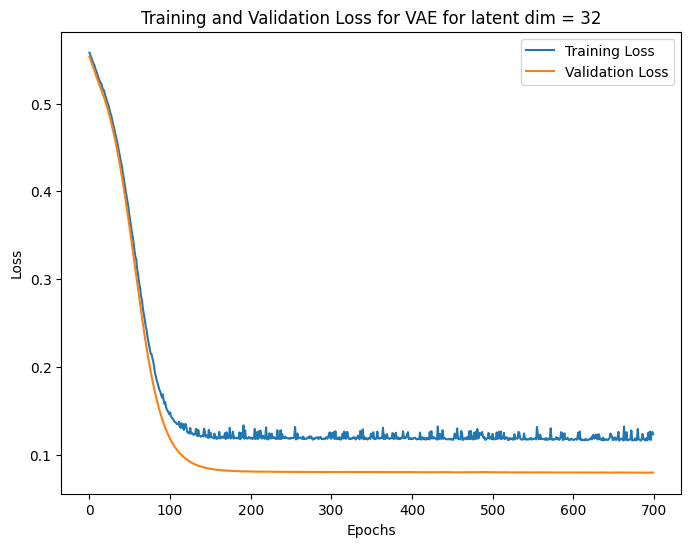

In [6]:
plt.figure(figsize=(8, 6))
### Plot the training loss ###
plt.plot(range(700), trainer.history["train"]["loss"], label="Training Loss")
### Plot the validation loss ###
plt.plot(range(700), trainer.history["val"]["loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for VAE for latent dim = 32")
plt.legend()
plt.show()

In [7]:
### Load best Regression VAE model ###
best_reg = RegressionNN(in_features=32, out_features=1)
best_reg = best_reg.to(device)
best_reg.load_state_dict(torch.load("Checkpoints/best_regressor_vae32d.pt", weights_only=True))
best_reg.eval()

_, testloss = trainer.predict(model=best_reg, testloader=testloader)

In [8]:
print(f"Test Set Loss = {testloss}")

Test Set Loss = 0.2482311986386776
